In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from time import *
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.metrics import mean_squared_error


In [2]:
## 1. data preprocessing


## import data
data = pd.read_csv('Life Expectancy Data.csv')

##rename
data.rename(columns={" BMI ":"BMI","Life expectancy ":"Life_Expectancy","Adult Mortality":"Adult_Mortality",
                   "infant deaths":"Infant_Deaths","percentage expenditure":"Percentage_Exp","Hepatitis B":"HepatitisB",
                  "Measles ":"Measles"," BMI ":"BMI","under-five deaths ":"Under_Five_Deaths","Diphtheria ":"Diphtheria",
                  " HIV/AIDS":"HIV/AIDS"," thinness  1-19 years":"thinness_1to19_years"," thinness 5-9 years":"thinness_5to9_years","Income composition of resources":"Income_Comp_Of_Resources",
                   "Total expenditure":"Tot_Exp"},inplace=True)


In [3]:
data

,Country,Year,Status,Life_Expectancy,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Exp,HepatitisB,Measles,...,Polio,Tot_Exp,Diphtheria,HIV/AIDS,GDP,Population,thinness_1to19_years,thinness_5to9_years,Income_Comp_Of_Resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [4]:
## check column status and data types
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Country                   2938 non-null   object 
 1   Year                      2938 non-null   int64  
 2   Status                    2938 non-null   object 
 3   Life_Expectancy           2928 non-null   float64
 4   Adult_Mortality           2928 non-null   float64
 5   Infant_Deaths             2938 non-null   int64  
 6   Alcohol                   2744 non-null   float64
 7   Percentage_Exp            2938 non-null   float64
 8   HepatitisB                2385 non-null   float64
 9   Measles                   2938 non-null   int64  
 10  BMI                       2904 non-null   float64
 11  Under_Five_Deaths         2938 non-null   int64  
 12  Polio                     2919 non-null   float64
 13  Tot_Exp                   2712 non-null   float64
 14  Diphther

In [5]:
# Identify percentage of null values in each column
data.isnull().sum()*100/data.isnull().count()


Country                      0.000000
Year                         0.000000
Status                       0.000000
Life_Expectancy              0.340368
Adult_Mortality              0.340368
Infant_Deaths                0.000000
Alcohol                      6.603131
Percentage_Exp               0.000000
HepatitisB                  18.822328
Measles                      0.000000
BMI                          1.157250
Under_Five_Deaths            0.000000
Polio                        0.646698
Tot_Exp                      7.692308
Diphtheria                   0.646698
HIV/AIDS                     0.000000
GDP                         15.248468
Population                  22.191967
thinness_1to19_years         1.157250
thinness_5to9_years          1.157250
Income_Comp_Of_Resources     5.684139
Schooling                    5.547992
dtype: float64

In [6]:
## fill null values using interpolation

country_list = data.Country.unique()
fill_list = ['Life_Expectancy','Adult_Mortality','Alcohol','HepatitisB','BMI',
             'Polio','Tot_Exp','Diphtheria','GDP','Population','thinness_1to19_years',
             'thinness_5to9_years','Income_Comp_Of_Resources','Schooling']

for country in country_list:
    data.loc[data['Country'] == country, fill_list] = data.loc[data['Country'] == country, fill_list].interpolate()
    
## drop remaining na entries
data.dropna(inplace = True)




In [7]:
## check how many entries left
data.shape

(1987, 22)

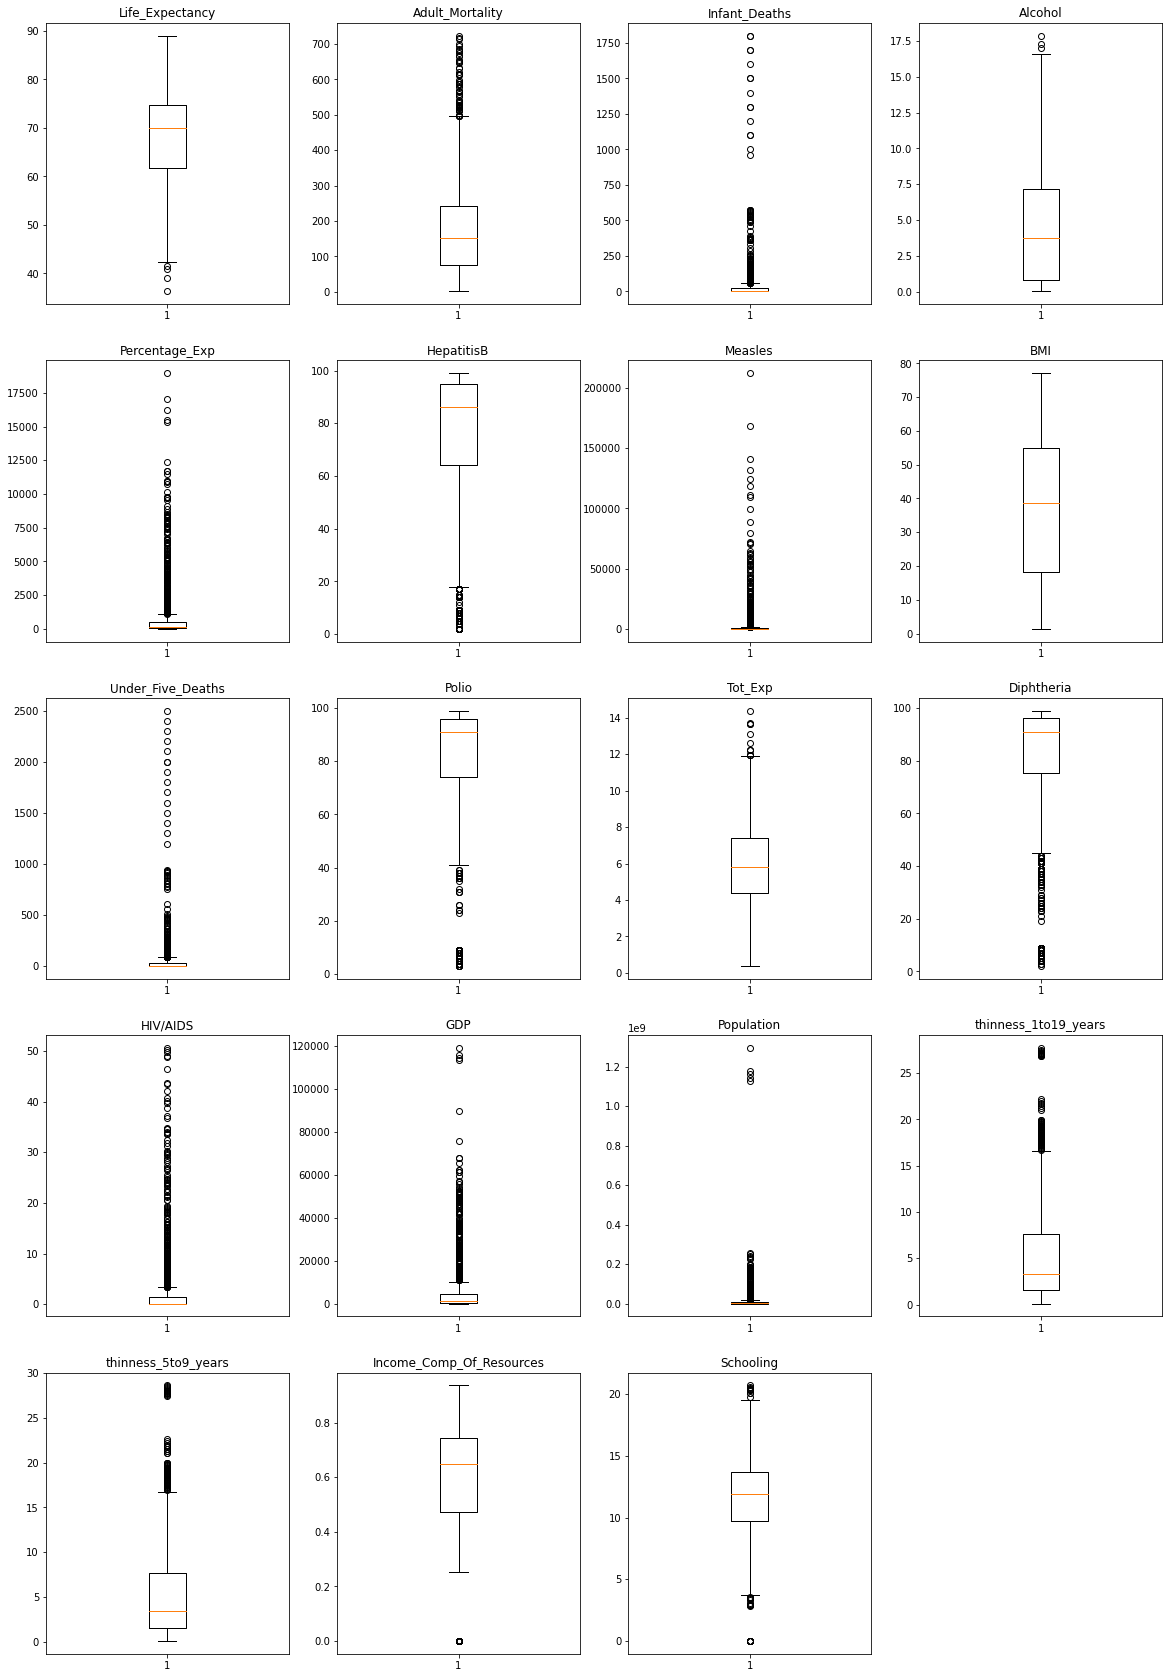

In [8]:
## 2. check and remove the outliers (winsorization technique)

# 2.1 check the outliers using box plots
# Create a dictionary of columns
col_dict = {'Life_Expectancy':1,'Adult_Mortality':2,'Infant_Deaths':3,'Alcohol':4,
            'Percentage_Exp':5,'HepatitisB':6,'Measles':7,'BMI':8,'Under_Five_Deaths':9,
            'Polio':10,'Tot_Exp':11,'Diphtheria':12,'HIV/AIDS':13,'GDP':14,'Population':15,
            'thinness_1to19_years':16,'thinness_5to9_years':17,'Income_Comp_Of_Resources':18,'Schooling':19}

# Detect outliers in each variable using box plots
plt.figure(figsize=(20,30))

for variable,i in col_dict.items():
                     plt.subplot(5,4,i)
                     plt.boxplot(data[variable],whis=1.5)
                     plt.title(variable)

plt.show()

In [9]:
# Calculate number of outliers and its percentage in each variable using Tukey's method.

for variable in col_dict.keys():
    q75, q25 = np.percentile(data[variable], [75 ,25])
    iqr = q75 - q25

    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    print("Number of outliers and percentage of it in {} : {} and {}".format(variable,
                                                                             len((np.where((data[variable] > max_val) | 
                                                                                           (data[variable] < min_val))[0])),len((np.where((data[variable] > max_val) | 
                                                                                           (data[variable] < min_val))[0]))*100/1987))


Number of outliers and percentage of it in Life_Expectancy : 4 and 0.20130850528434827
Number of outliers and percentage of it in Adult_Mortality : 58 and 2.9189733266230498
Number of outliers and percentage of it in Infant_Deaths : 198 and 9.96477101157524
Number of outliers and percentage of it in Alcohol : 3 and 0.1509813789632612
Number of outliers and percentage of it in Percentage_Exp : 232 and 11.675893306492199
Number of outliers and percentage of it in HepatitisB : 216 and 10.870659285354806
Number of outliers and percentage of it in Measles : 361 and 18.16809260191243
Number of outliers and percentage of it in BMI : 0 and 0.0
Number of outliers and percentage of it in Under_Five_Deaths : 227 and 11.424257674886764
Number of outliers and percentage of it in Polio : 159 and 8.002013085052843
Number of outliers and percentage of it in Tot_Exp : 13 and 0.6542526421741318
Number of outliers and percentage of it in Diphtheria : 195 and 9.813789632611979
Number of outliers and perce

In [10]:
# 2.2 winsorize the data by columns according to the box plots and percentage of outliers
from scipy.stats.mstats import winsorize

data['Life_Expectancy'] = winsorize(data['Life_Expectancy'],(0.01,0))
data['Adult_Mortality'] = winsorize(data['Adult_Mortality'],(0,0.03))
data['Infant_Deaths'] = winsorize(data['Infant_Deaths'],(0,0.10))
data['Alcohol'] = winsorize(data['Alcohol'],(0,0.01))
data['Percentage_Exp'] = winsorize(data['Percentage_Exp'],(0,0.12))
data['HepatitisB'] = winsorize(data['HepatitisB'],(0.11,0))
#drop Measles because of 20% outliers 
data = data.drop('Measles',axis=1)
data['Under_Five_Deaths'] = winsorize(data['Under_Five_Deaths'],(0,0.12))
data['Polio'] = winsorize(data['Polio'],(0.09,0))
data['Tot_Exp'] = winsorize(data['Tot_Exp'],(0,0.01))
data['Diphtheria'] = winsorize(data['Diphtheria'],(0.10,0))
data['HIV/AIDS'] = winsorize(data['HIV/AIDS'],(0,0.16))
data['GDP'] = winsorize(data['GDP'],(0,0.13))
data['Population'] = winsorize(data['Population'],(0,0.14))
data['thinness_1to19_years'] = winsorize(data['thinness_1to19_years'],(0,0.04))
data['thinness_5to9_years'] = winsorize(data['thinness_5to9_years'],(0,0.04))
data['Income_Comp_Of_Resources'] = winsorize(data['Income_Comp_Of_Resources'],(0.05,0))
data['Schooling'] = winsorize(data['Schooling'],(0.02,0.01))





In [11]:
# 3. Descriptive statistics 

# continuous variables
data.drop(['Country','Status'], axis = 1, inplace = True)
data.describe()


,Year,Life_Expectancy,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Exp,HepatitisB,BMI,Under_Five_Deaths,Polio,Tot_Exp,Diphtheria,HIV/AIDS,GDP,Population,thinness_1to19_years,thinness_5to9_years,Income_Comp_Of_Resources,Schooling
count,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1.987000e+03,1987.000000,1987.000000,1987.000000,1987.000000
mean,2006.984902,68.000956,172.334172,15.502265,4.443566,306.331272,74.977353,36.428636,21.738299,82.957725,5.895471,83.225969,0.874082,2864.719760,4.799769e+06,4.955561,5.024006,0.616143,11.658581
std,4.323147,9.656676,122.914052,20.877993,3.943939,379.046366,26.527285,19.736138,29.994594,17.556131,2.266421,17.239348,1.183198,3186.069874,6.217060e+06,4.187776,4.265385,0.174584,3.102260
min,2000.000000,45.100000,1.000000,0.000000,0.010000,0.000000,18.000000,1.400000,0.000000,44.000000,0.370000,45.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.276000,4.500000
25%,2003.000000,61.700000,75.000000,1.000000,0.830000,29.469887,64.000000,18.150000,1.000000,74.000000,4.360000,75.500000,0.100000,384.553107,1.967480e+05,1.600000,1.600000,0.473000,9.700000
50%,2007.000000,69.900000,153.000000,4.000000,3.770000,104.314473,86.000000,38.700000,4.000000,91.000000,5.800000,91.000000,0.100000,1334.651896,1.396861e+06,3.300000,3.400000,0.648000,11.900000
75%,2011.000000,74.700000,243.000000,25.000000,7.190000,470.870122,95.000000,55.000000,36.000000,96.000000,7.385000,96.000000,1.400000,4441.530655,7.625918e+06,7.600000,7.700000,0.745000,13.700000
max,2015.000000,89.000000,491.000000,61.000000,14.090000,1111.191325,99.000000,77.100000,85.000000,99.000000,11.700000,99.000000,3.200000,9291.227619,1.699335e+07,15.700000,16.300000,0.936000,18.600000


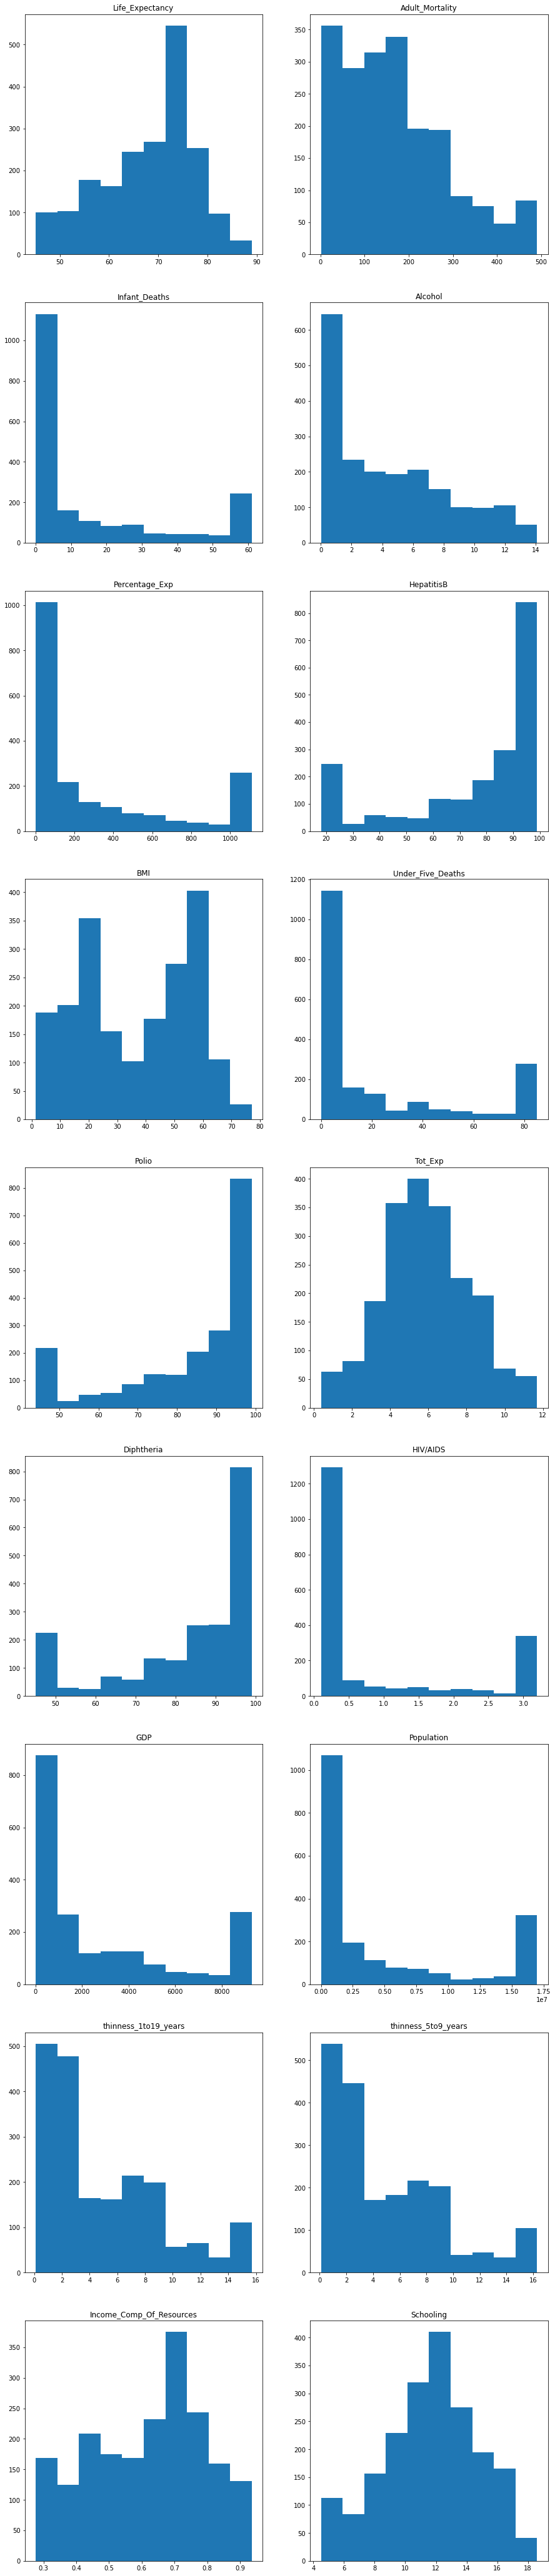

In [12]:
# Distribution of each numerical variable
variable_list = ['Life_Expectancy', 'Adult_Mortality','Infant_Deaths','Alcohol',
                 'Percentage_Exp','HepatitisB','BMI','Under_Five_Deaths',
                 'Polio','Tot_Exp','Diphtheria', 'HIV/AIDS','GDP','Population',
                 'thinness_1to19_years','thinness_5to9_years','Income_Comp_Of_Resources',
                 'Schooling']

plt.figure(figsize=(15,75))

for i in range(len(variable_list)):
    plt.subplot(9,2,i+1)
    plt.hist(data[variable_list[i]])
    plt.title(variable_list[i])

plt.show()

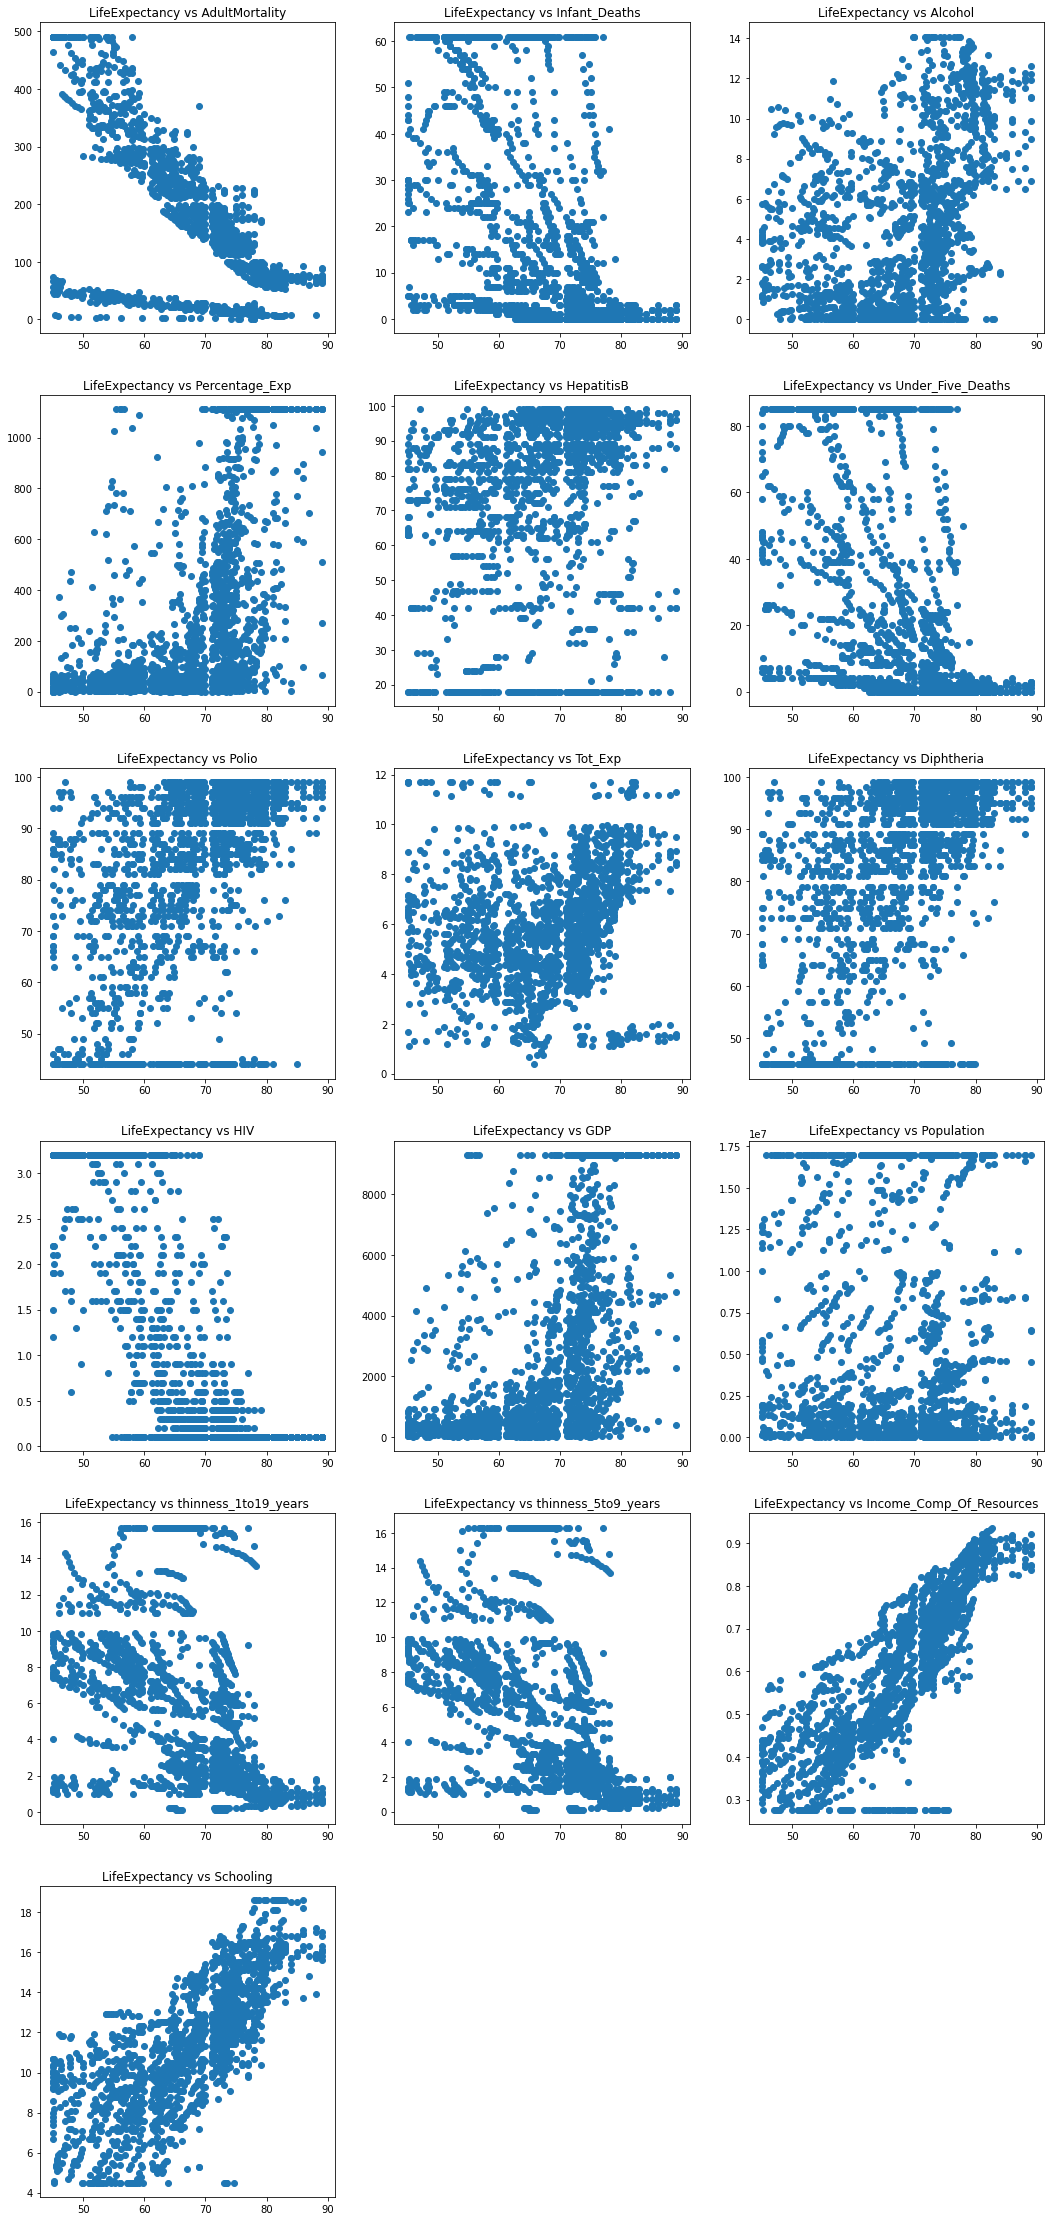

In [13]:
# 4. Feature Engineering

# Scatter plot between the target variable(Life_Expectancy) and all continuous variables
plt.figure(figsize=(18,40))

plt.subplot(6,3,1)
plt.scatter(data["Life_Expectancy"], data["Adult_Mortality"])
plt.title("LifeExpectancy vs AdultMortality")

plt.subplot(6,3,2)
plt.scatter(data["Life_Expectancy"], data["Infant_Deaths"])
plt.title("LifeExpectancy vs Infant_Deaths")

plt.subplot(6,3,3)
plt.scatter(data["Life_Expectancy"], data["Alcohol"])
plt.title("LifeExpectancy vs Alcohol")

plt.subplot(6,3,4)
plt.scatter(data["Life_Expectancy"], data["Percentage_Exp"])
plt.title("LifeExpectancy vs Percentage_Exp")

plt.subplot(6,3,5)
plt.scatter(data["Life_Expectancy"], data["HepatitisB"])
plt.title("LifeExpectancy vs HepatitisB")

plt.subplot(6,3,6)
plt.scatter(data["Life_Expectancy"], data["Under_Five_Deaths"])
plt.title("LifeExpectancy vs Under_Five_Deaths")

plt.subplot(6,3,7)
plt.scatter(data["Life_Expectancy"], data["Polio"])
plt.title("LifeExpectancy vs Polio")

plt.subplot(6,3,8)
plt.scatter(data["Life_Expectancy"], data["Tot_Exp"])
plt.title("LifeExpectancy vs Tot_Exp")

plt.subplot(6,3,9)
plt.scatter(data["Life_Expectancy"], data["Diphtheria"])
plt.title("LifeExpectancy vs Diphtheria")

plt.subplot(6,3,10)
plt.scatter(data["Life_Expectancy"], data["HIV/AIDS"])
plt.title("LifeExpectancy vs HIV")

plt.subplot(6,3,11)
plt.scatter(data["Life_Expectancy"], data["GDP"])
plt.title("LifeExpectancy vs GDP")

plt.subplot(6,3,12)
plt.scatter(data["Life_Expectancy"], data["Population"])
plt.title("LifeExpectancy vs Population")

plt.subplot(6,3,13)
plt.scatter(data["Life_Expectancy"], data["thinness_1to19_years"])
plt.title("LifeExpectancy vs thinness_1to19_years")

plt.subplot(6,3,14)
plt.scatter(data["Life_Expectancy"], data["thinness_5to9_years"])
plt.title("LifeExpectancy vs thinness_5to9_years")

plt.subplot(6,3,15)
plt.scatter(data["Life_Expectancy"], data["Income_Comp_Of_Resources"])
plt.title("LifeExpectancy vs Income_Comp_Of_Resources")

plt.subplot(6,3,16)
plt.scatter(data["Life_Expectancy"], data["Schooling"])
plt.title("LifeExpectancy vs Schooling")


plt.show()


# from the scatter plots we can see that life_expectancy is highly correlated with Adultmortality, alcohol, income_comp_of_resources, schooling. 
# and we also want to control the GDP

y = data['Life_Expectancy']
regvariable = ['Adult_Mortality','Alcohol','GDP','Income_Comp_Of_Resources','Schooling']
x = data[regvariable]


In [14]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 2937
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Adult_Mortality           1987 non-null   float64
 1   Alcohol                   1987 non-null   float64
 2   GDP                       1987 non-null   float64
 3   Income_Comp_Of_Resources  1987 non-null   float64
 4   Schooling                 1987 non-null   float64
dtypes: float64(5)
memory usage: 93.1 KB


In [16]:

# 5. linear regression using Ordinary least squares Linear Regression

# 5.1 split data
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.2, random_state = 22)

# 5.2 data standarize
transfer = StandardScaler()
x_train = transfer.fit_transform(x_train)
x_test = transfer.transform(x_test)


# 5.2 estimator using linear regression(xx/xy)
t = time()
estimator1 = LinearRegression()
model = estimator1.fit(x_train,y_train)

# 5.3 estimation1 results
print("linear regression: \n", np.round_(time()-t,3),"sec elapsed")
print("b_0: ", estimator1.intercept_)
print("b_i: ", estimator1.coef_)

# 5.4 estimator using Gradient Descent(Newton Method)
t = time()
estimator2 = SGDRegressor()
model = estimator2.fit(x_train,y_train)

# 5.5 estimation2 results
print("Gradient Descent: \n", np.round_(time()-t,3),"sec elapsed")
print("b_0: ", estimator2.intercept_)
print("b_i: ", estimator2.coef_)

# 5.4 model evaluation
y_predict = estimator1.predict(x_test)
error = mean_squared_error(y_test,y_predict)
r2 = cross_val_score(model, x_train,  y_train, cv= 10, scoring="r2").mean()
print("mean squared error: ",error)
print("r2:",r2)





linear regression: 
 0.009 sec elapsed
b_0:  67.9802391441158
b_i:  [-3.0586418  -1.0717768   0.3376192   5.1695627   1.80220509]
Gradient Descent: 
 0.006 sec elapsed
b_0:  [68.00166895]
b_i:  [-2.97311227 -1.05489524  0.30394309  5.10416865  1.8212785 ]
mean squared error: 22.320304550188375
r2: 0.7695286100519407


### Conclusions and main takeaways:
 - Gradient Descent is faster than the xx/xy matrix calculation which used by Sklearn.LinearRegressor. 
 
 - Adult mortality rates(probability of dying between 15 and 60 years per 1000 population) and alcohol consumption are negatively related with life expectancy with the coefficients -3.06 and -1.07 respectively. As we standarized the data, we can therefore conclude that adult mortality rates is more import to predict life expectancy than alcohol comsumption. 
 - Income_Comp_Of_Resources(Human Development Index in terms of income composition of resources) and schooling (years of schooling) are positively correlated with life expectancy, with coefficients 5.17 and 1.80 respectively.
 - Income_Comp_Of_Resources(Human Development Index in terms of income composition of resources) is the most important variable that predicts the life expectancy of one country. 
 - Ordary Least Square (coefficient = xx/xy) carries out results with good accuracy ( MSE = 22.32, R2 = 0.77). The computation is fast enough, probably because the dataset is not too large. 
 